In [92]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [240]:
backend_sim = Aer.get_backend('qasm_simulator')
backend_exp = provider.get_backend('ibmq_16_melbourne')

In [128]:
def uf0(qc):
    return qc 

def uf1(qc):
    qc.cx(0,1)
    return qc
    
def uf2(qc):
    qc.x(1)
    qc.cx(0,1)
    return qc
    
def uf3(qc):
    qc.x(1)
    return qc

def deutsch(qc, f):
    qc.x(1)
    qc.h(0)
    qc.h(1)
    f(qc)
    qc.h(1)
    qc.h(0)
    return qc

def mesure(qc):
    qc.barrier()
    qc.measure(0, 0)
    qc.measure(1, 1)
    return qc

def execute_sim(qc):
    return execute(qc, backend_sim, shots=1024)

def execute_exp(qc):
    return execute(qc, backend_exp, shots=1024)
    
def plot(qc, job):
    result = job.result()
    counts = result.get_counts(qc)
    return plot_histogram(counts)

### Uf0
grupa stała

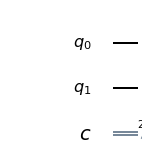

In [67]:
qc = uf0(QuantumCircuit(2,2))
qc.draw()

### Uf1
grupa zmienna

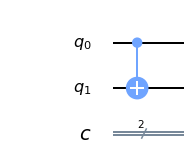

In [68]:
qc = uf1(QuantumCircuit(2,2))
qc.draw()

### Uf2
grupa zmienna

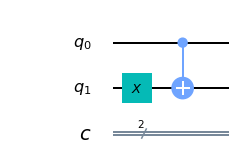

In [69]:
qc = uf2(QuantumCircuit(2,2))
qc.draw()

### Uf3
grupa stała

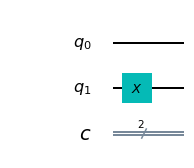

In [70]:
qc = uf3(QuantumCircuit(2,2))
qc.draw()

# Problemu Deutscha 
W problemie Deutscha-Jozsy mamy daną wyrocznię – komputer kwantowy reprezentowany przez czarną skrzynkę, który implementuje funkcję f:{0,1}^n -> {0,1}. Gwarantowane jest, że f jest funkcją stałą lub zbalansowaną (zwraca 0 dla połowy dziedziny i 1 dla drugiej połowy). Zadanie polega na określeniu, korzystając z wyroczni, czy f jest stała, czy zbalansowana.

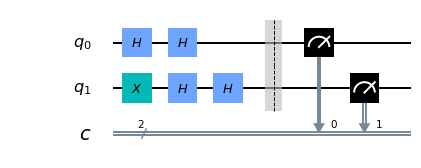

In [129]:
qc_uf0 = mesure(deutsch(QuantumCircuit(2,2), uf0))
sim_uf0 = execute_sim(qc_uf0)
exp_uf0 = execute_exp(qc_uf0)
qc_uf0.draw()

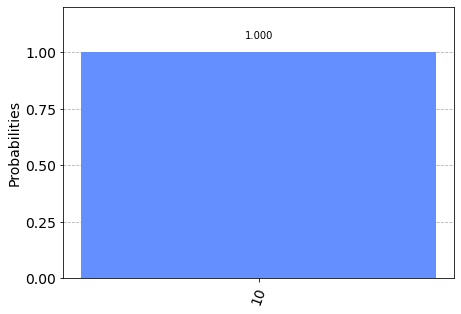

In [133]:
plot(qc_uf0, sim_uf0)

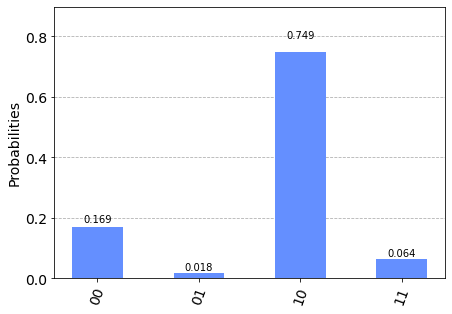

In [134]:
plot(qc_uf0, exp_uf0)

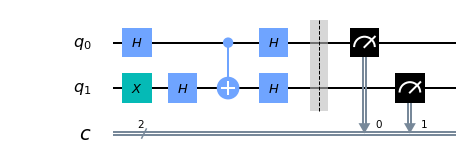

In [130]:
qc_uf1 = mesure(deutsch(QuantumCircuit(2,2), uf1))
sim_uf1 = execute_sim(qc_uf1)
exp_uf1 = execute_exp(qc_uf1)
qc_uf1.draw()

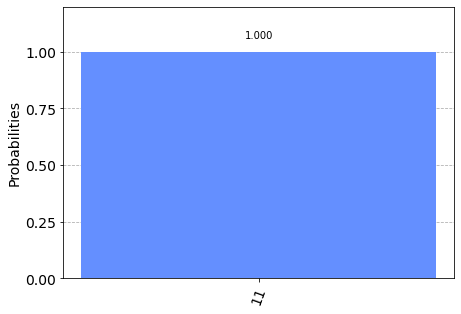

In [135]:
plot(qc_uf1, sim_uf1)

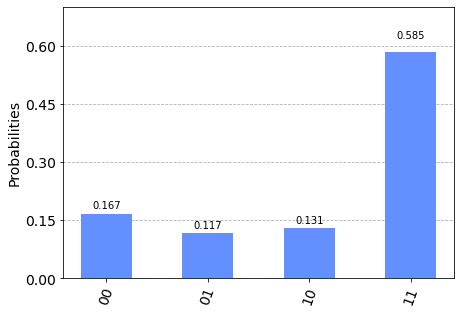

In [136]:
plot(qc_uf1, exp_uf1)

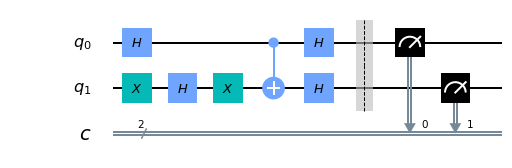

In [131]:
qc_uf2 = mesure(deutsch(QuantumCircuit(2,2), uf2))
sim_uf2 = execute_sim(qc_uf2)
exp_uf2 = execute_exp(qc_uf2)
qc_uf2.draw()

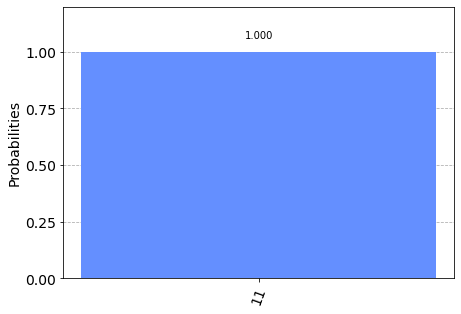

In [137]:
plot(qc_uf2, sim_uf2)

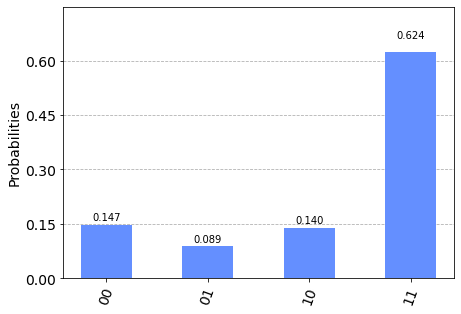

In [138]:
plot(qc_uf2, exp_uf2)

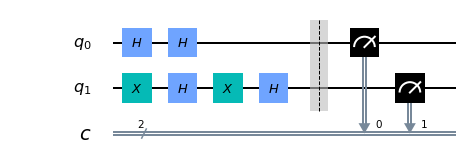

In [132]:
qc_uf3 = mesure(deutsch(QuantumCircuit(2,2), uf3))
sim_uf3 = execute_sim(qc_uf3)
exp_uf3 = execute_exp(qc_uf3)
qc_uf3.draw()

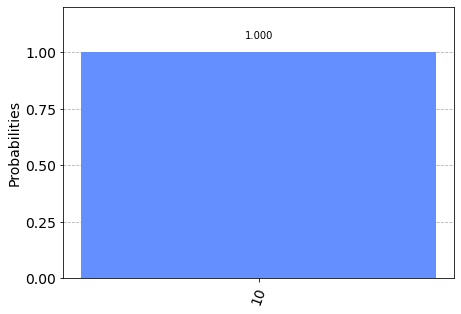

In [139]:
plot(qc_uf3, sim_uf3)

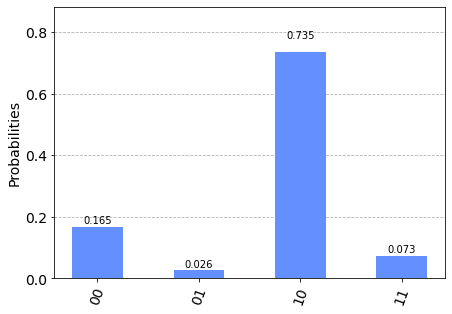

In [140]:
plot(qc_uf3, exp_uf3)

Wyżej obserwujemy wyniki dla każdej z czterech bramek Uf kolejno dla symulatora i urządzenia kwantowego. Wynik interpretujemy przez badanie pierwszego bita jeżeli jego wartość przyjmuje wartość 0 to funkcja należy do stałych jeżeli ma wartość 1 jest to funkcja zmienna. Dla urządzenia kwantowego obserwujemy niewielkie zaburzenia jednak wyniki prawidłowy wynik jest otrzymywany z większym prawdopodobieństem. 

# Problem Bersteina-Vaziraniego
W problemie Bersteina-Vaziraniego mamy daną wyrocznię – komputer kwantowy reprezentowany przez czarną skrzynkę, który implementuje funkcję f:{0,1}^n -> {0,1}. Gwarantowane jest, że f jest prduktem skalarnym pomiędzy x a ukrytm ciągiem a. Zadanie polega na znalezienie a, korzystając z wyroczni.

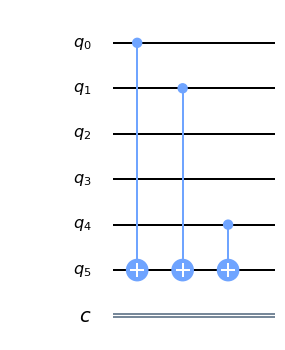

In [260]:
# bramka Uf 
a = [1, 1, 0, 0, 1]
uf(QuantumCircuit(6,1), a).draw()

In [237]:
def uf(qc, a):
    a = list(enumerate(a.copy()))
    a.reverse
    [qc.cx(i, 5) for i, b in a if b]       
    return qc 

def mesure_classic(qc):
    qc.barrier()
    qc.measure(5, 0)
    return qc

def mesure_quantum(qc):
    qc.barrier()
    qc.measure(4, 0)
    qc.measure(3, 1)
    qc.measure(2, 2)
    qc.measure(1, 3)
    qc.measure(0, 4)
    return qc

def hadamard(qc, a, f):
    qc.x(5)
    [qc.h(i) for i in range(6)]
    qc.barrier()
    f(qc, a)
    qc.barrier()
    [qc.h(i) for i in range(6)]
    return qc

In [247]:
def run_classic(a, exec):
    classic = []
    for i in range(5):
        qc = QuantumCircuit(6,1)
        qc.x(i)
        qc.barrier()
        mesure_classic(uf(qc, a))
        classic.append((qc, exec(qc)))
    return classic

def run_classic_sim(a):
    return run_classic(a, execute_sim)
    
def run_classic_exp(a):
    return run_classic(a, execute_exp)

In [248]:
a = [1, 1, 0, 0, 1]

classic_sim = run_classic_sim(a)
classic_exp = run_classic_exp(a)

dla każdego z pięciu 0-4 po kolei ustawiamy wartość 1 i wykonujemy układ 

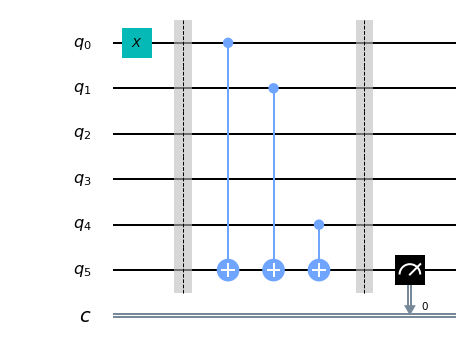

In [224]:
classic_sim[0][0].draw()

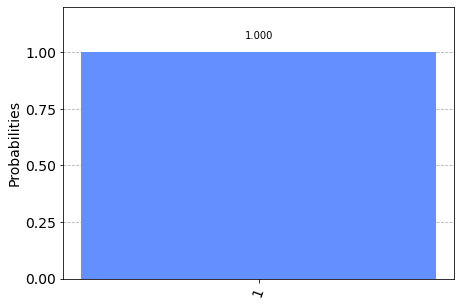

In [225]:
plot(*classic_sim[0])

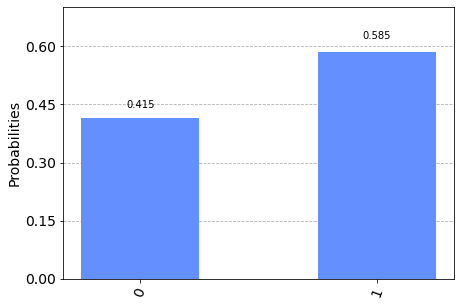

In [251]:
plot(*classic_exp[0])

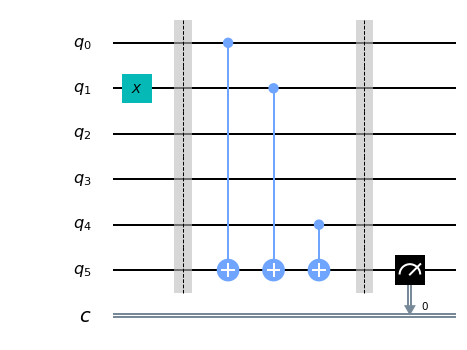

In [229]:
classic_sim[1][0].draw()

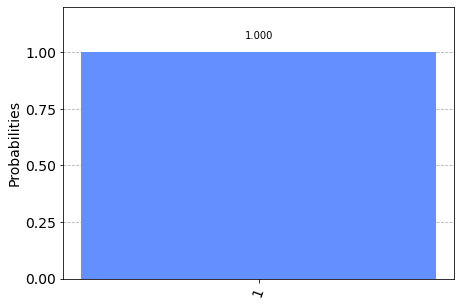

In [252]:
plot(*classic_sim[1])

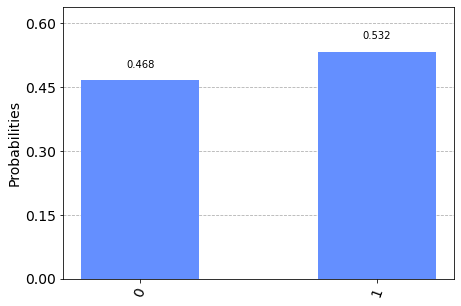

In [253]:
plot(*classic_exp[1])

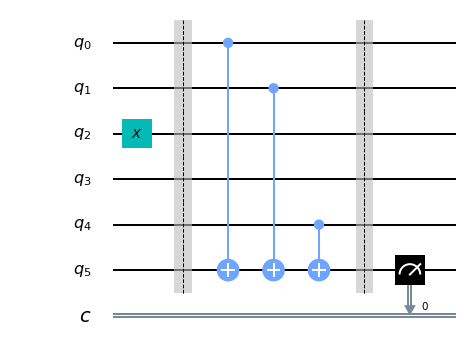

In [231]:
classic_sim[2][0].draw()

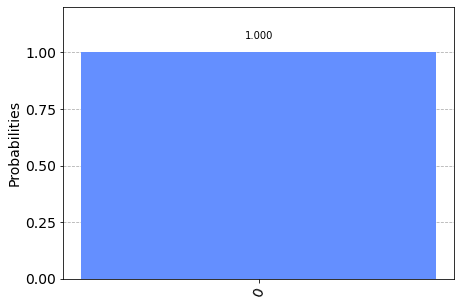

In [232]:
plot(*classic_sim[2])

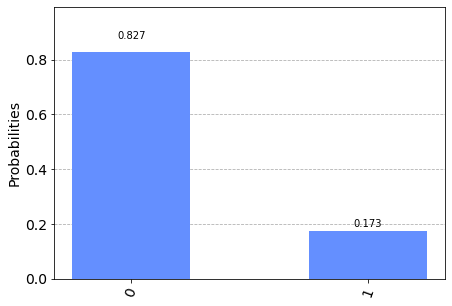

In [254]:
plot(*classic_exp[2])

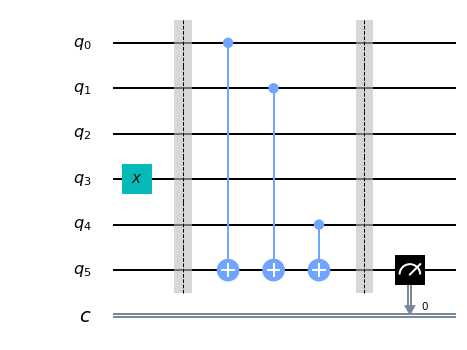

In [233]:
classic_sim[3][0].draw()

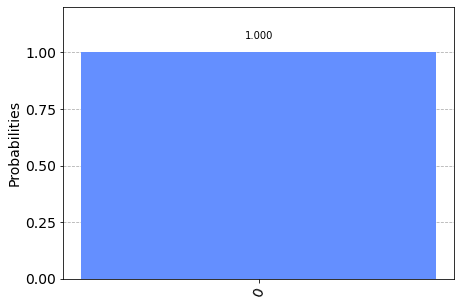

In [255]:
plot(*classic_sim[3])

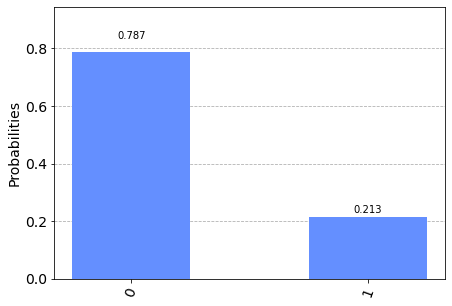

In [256]:
plot(*classic_exp[3])

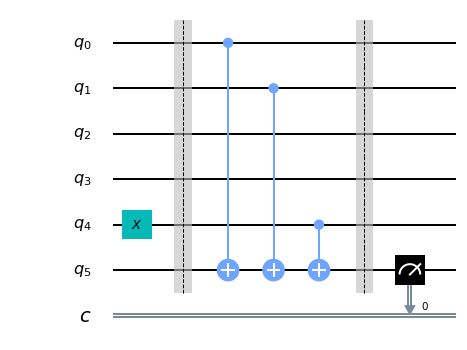

In [235]:
classic_sim[4][0].draw()

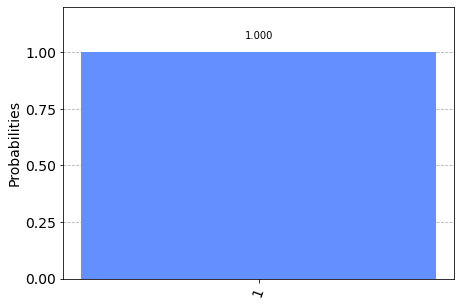

In [257]:
plot(*classic_sim[4])

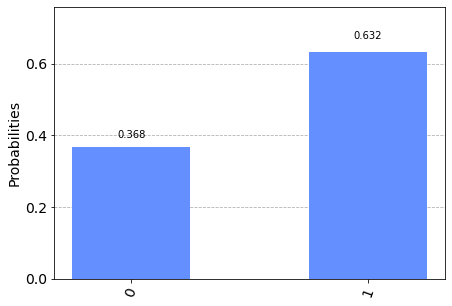

In [258]:
plot(*classic_exp[4])

Powyższe wyniki dla rozwiązania klasycznego kolejno uruchomione w symulacji i urządzeniu kwantowym. Wynik odczytujemy z ostatniego bitu (5) dla symulacji każdy z pięciu odpaleń zwraca taki sam wynik co określony w ciągu a = [1, 1, 0, 0, 1]. Dla urządzenia kwantowego wyniki są zaburzone jednak poprawny wynik za każdym razem jest z większym prawdopodobieństwem. 

### Rozwiązanie Kwantowe

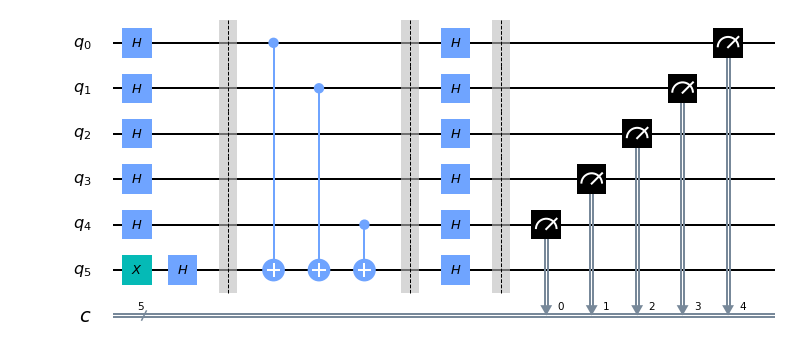

In [238]:
a = [1, 1, 0, 0, 1]

quantum = mesure_quantum(hadamard(QuantumCircuit(6,5), a, uf))
quantum.draw()

In [241]:
quantum_sim = execute_sim(quantum)
quantum_exp = execute_exp(quantum)

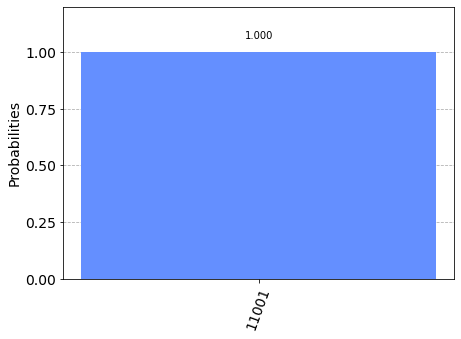

In [249]:
plot(quantum, quantum_sim)

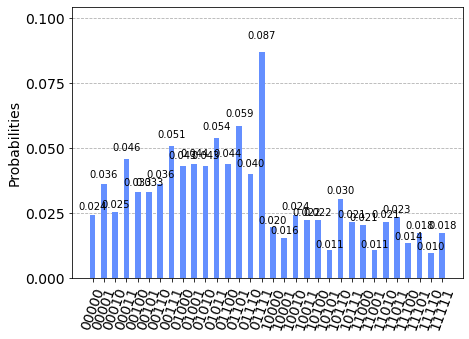

In [250]:
plot(quantum, quantum_exp)

Tak jak w poprzednik zadaniu wykorzystujemy bramki hadamarda, w porównaniu do rozwiązania klasycznego tym razem ustawiamy wartość 1 na ostanim bicie (5). Wynik otrzymujemy na bitach wejscowych (0-4). Dla symulatora wynik jest tym samym ciągiem co ciąg a = [1, 1, 0, 0, 1]. Dla urządzenia kwantowego ilosć otrzymanych wyników wynosiła 32, widzimy że wynik z największym prawdopodobieństwem 8.7% nie jest ciągiem który był przez nas szukany, poprawny ciąg posiada prawdopodobieństwo 2.2%.